In [3]:
print('leul world')

leul world


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')
sns

<module 'seaborn' from 'd:\\Ai\\Fraud detection\\.venv\\Lib\\site-packages\\seaborn\\__init__.py'>

In [6]:
df = pd.read_csv('../AIML Dataset.csv')

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [12]:
df.isnull().sum().sum()

np.int64(0)

In [13]:
df.shape

(6362620, 11)

In [14]:
## fraude percentage
fraud_percentage = round((df['isFraud'].sum() / df.shape[0]) * 100,2)
print(f"Fraud Percentage: {fraud_percentage:.4f}%")

Fraud Percentage: 0.1300%


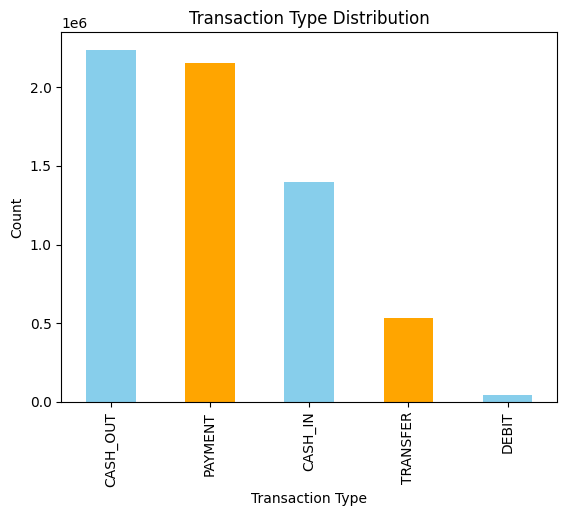

In [15]:
## visualization
df['type'].value_counts().plot(kind='bar', title='Transaction Type Distribution', color=['skyblue', 'orange'])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()
 

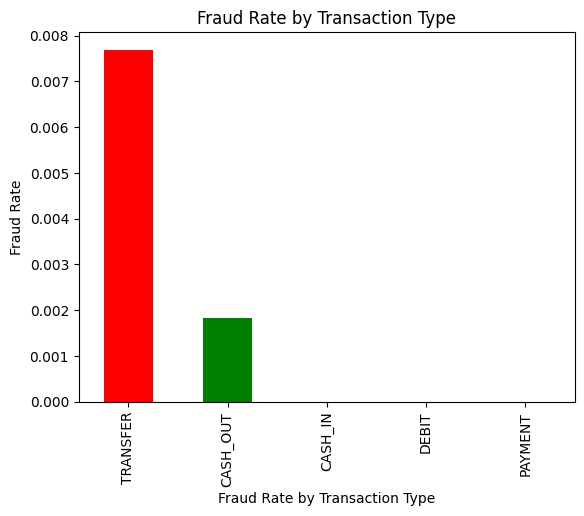

In [16]:
fraud_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', title='Fraud Rate by Transaction Type', color=['red', 'green', 'blue', 'orange', 'purple', 'cyan'])
plt.xlabel('Fraud Rate by Transaction Type')
plt.ylabel('Fraud Rate')
plt.show()  

In [17]:
df["amount"].describe().astype('int')

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

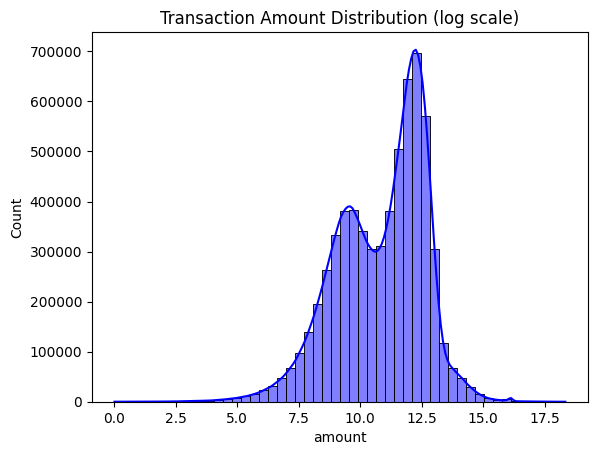

In [18]:
sns.histplot(np.log1p(df['amount']) , bins=50, kde=True, color='blue')
plt.title('Transaction Amount Distribution (log scale)') 
plt.show()

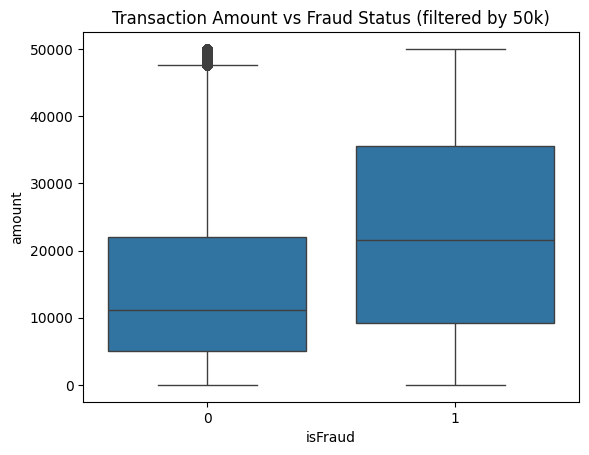

In [19]:
sns.boxplot(data=df[df["amount"]<50000],x='isFraud', y='amount')
plt.title('Transaction Amount vs Fraud Status (filtered by 50k)')
plt.show()

In [20]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [21]:
df['oldbalanceOrg']=df["oldbalanceOrg"]-df["newbalanceOrig"]
df['oldbalanceDest']=df["newbalanceDest"]-df["oldbalanceDest"]
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,9839.64,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,1864.28,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,-21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,11668.14,29885.86,M1230701703,0.0,0.0,0,0


In [22]:

print((df["balanceDifOrig"] < 0).sum())
print((df["balanceDifDest"] < 0).sum())

KeyError: 'balanceDifOrig'

In [ ]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDifDest,balanceDifOrig
0,1,PAYMENT,9839.64,C1231006815,-471049.44,160296.36,M1979787155,0.0,0.0,0,0,0.0,-471049.44
1,1,PAYMENT,1864.28,C1666544295,-56289.88,19384.72,M2044282225,0.0,0.0,0,0,0.0,-56289.88


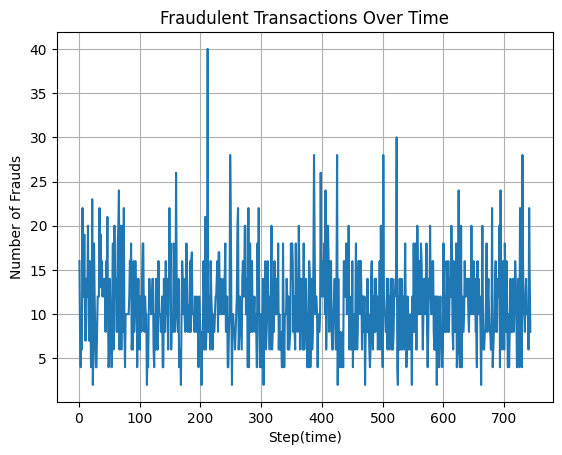

In [ ]:
fraud_per_step= df[df["isFraud"]==1] ["step"].value_counts().sort_index()
plt.plot(fraud_per_step.index, fraud_per_step.values,label='Fraud per step')
plt.xlabel('Step(time)')
plt.ylabel('Number of Frauds')
plt.title('Fraudulent Transactions Over Time')
plt.grid(True)
plt.show()

In [ ]:
df.drop(columns=['step'], inplace=True)

In [ ]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDifDest,balanceDifOrig
0,PAYMENT,9839.64,C1231006815,-471049.44,160296.36,M1979787155,0.0,0.0,0,0,0.0,-471049.44
1,PAYMENT,1864.28,C1666544295,-56289.88,19384.72,M2044282225,0.0,0.0,0,0,0.0,-56289.88
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1,0,0.0,181.00
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1,0,21182.0,181.00
4,PAYMENT,11668.14,C2048537720,-77989.44,29885.86,M1230701703,0.0,0.0,0,0,0.0,-77989.44


In [ ]:
top_senders= df['nameOrig'].value_counts().head(10)

In [ ]:
top_senders


nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [ ]:
top_receivers = df['nameDest'].value_counts().head(10)
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [ ]:

fraud_users= df[df['isFraud']==1]['nameOrig'].value_counts().head(10)


In [ ]:
fraud_users

nameOrig
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
C1364127192    1
Name: count, dtype: int64

In [ ]:
fraud__type= df[df['type'].isin(['TRANSFER','CASH_OUT'])]
fraud__type.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDifDest,balanceDifOrig
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,0.0,181.0
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,21182.0,181.0
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,5083.0,15325.0
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,22425.0,705.0
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,6267.0,10835.0


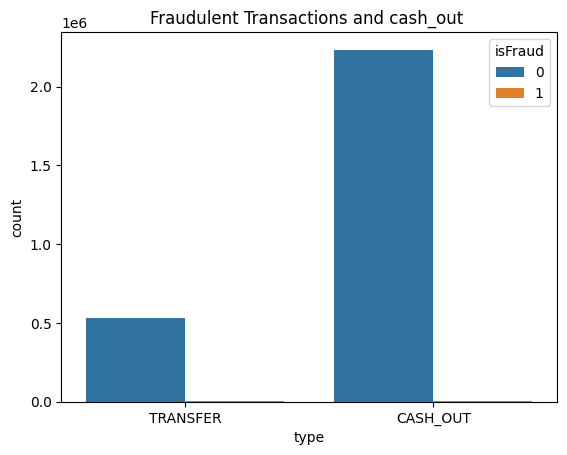

In [ ]:
sns.countplot(data=fraud__type, x='type', hue='isFraud')
plt.title('Fraudulent Transactions and cash_out ')
plt.show()

In [23]:
## correlation matrix
corr = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,0.102337,-0.007861,0.845964,0.459304,0.076688
oldbalanceOrg,0.102337,1.000000,-0.267750,0.169292,-0.006451,0.362472
newbalanceOrig,-0.007861,-0.267750,1.000000,-0.094456,0.041837,-0.008148
oldbalanceDest,0.845964,0.169292,-0.094456,1.000000,0.436191,0.027028
newbalanceDest,0.459304,-0.006451,0.041837,0.436191,1.000000,0.000535
isFraud,0.076688,0.362472,-0.008148,0.027028,0.000535,1.000000
